In [157]:
df=pd.read_csv('Datasets/USA Sales.csv')
df.head(50)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,89.3,2,2679.0,2/24/2018 0:00,Shipped,1,2,2018,Motorcycles,95,Land of Toys Inc.,NYC,NY,10022.0,USA,Yu,Kwai,Small
1,10145,45,73.9,6,3325.5,8/25/2018 0:00,Shipped,3,8,2018,Motorcycles,95,Toys4GrownUps.com,Pasadena,CA,90003.0,USA,Young,Julie,Medium
2,10159,49,84.5,14,4140.5,10/10/2018 0:00,Shipped,4,10,2018,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,CA,NaN,USA,Brown,Julie,Medium
3,10168,36,81.2,1,2923.2,10/28/2018 0:00,Shipped,4,10,2018,Motorcycles,95,Technics Stores Inc.,Burlingame,CA,94217.0,USA,Hirano,Juri,Medium
4,10201,22,86.1,2,1894.2,12/1/2018 0:00,Shipped,4,12,2018,Motorcycles,95,Mini Wheels Co.,San Francisco,CA,NaN,USA,Murphy,Julie,Small
5,10237,23,82.5,7,1897.5,4/5/2019 0:00,Shipped,2,4,2019,Motorcycles,95,Vitachrome Inc.,NYC,NY,10022.0,USA,Frick,Michael,Small
6,10251,28,98.3,2,2752.4,5/18/2019 0:00,Shipped,2,5,2019,Motorcycles,95,Tekni Collectables Inc.,Newark,NJ,94019.0,USA,Brown,William,Medium
7,10263,34,78.0,2,2652.0,6/28/2019 0:00,Shipped,2,6,2019,Motorcycles,95,Gift Depot Inc.,Bridgewater,CT,97562.0,USA,King,Julie,Medium
8,10285,36,77.5,6,2790.0,8/27/2019 0:00,Shipped,3,8,2019,Motorcycles,95,Marta's Replicas Co.,Cambridge,MA,51247.0,USA,Hernandez,Marta,Medium
9,10318,46,81.8,1,3762.8,11/2/2019 0:00,Shipped,4,11,2019,Motorcycles,95,Diecast Classics Inc.,Allentown,PA,70267.0,USA,Yu,Kyung,Medium


In [138]:
e = []
for e in range(0,1004):
    e += 1
print(e)

1004


In [139]:
a = df[['CUSTOMERNAME', 'SALES', 'PRICEEACH']]
a

,CUSTOMERNAME,SALES,PRICEEACH
0,Land of Toys Inc.,2679.0,89.3
1,Toys4GrownUps.com,3325.5,73.9
2,Corporate Gift Ideas Co.,4140.5,84.5
3,Technics Stores Inc.,2923.2,81.2
4,Mini Wheels Co.,1894.2,86.1
...,...,...,...
999,Mini Creations Ltd.,2349.2,83.9
1000,Collectable Mini Designs Co.,2340.0,65.0
1001,Land of Toys Inc.,1564.0,68.0
1002,Classic Legends Inc.,3956.4,94.2


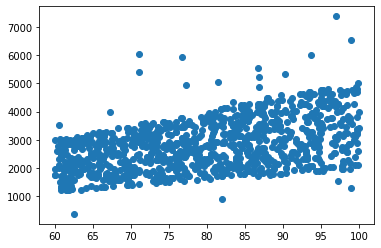

In [140]:
plt.scatter(a['PRICEEACH'], a['SALES'])

In [141]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [142]:
y_pred=km.fit_predict(a[['PRICEEACH','SALES']])
y_pred

array([0, 0, 2, ..., 1, 2, 2], dtype=int32)

In [143]:
a['cluster'] = y_pred
a.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CUSTOMERNAME,SALES,PRICEEACH,cluster
0,Land of Toys Inc.,2679.0,89.3,0
1,Toys4GrownUps.com,3325.5,73.9,0
2,Corporate Gift Ideas Co.,4140.5,84.5,2
3,Technics Stores Inc.,2923.2,81.2,0
4,Mini Wheels Co.,1894.2,86.1,1


No handles with labels found to put in legend.


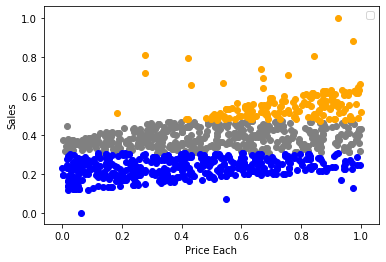

In [153]:
a0=a[a.cluster==0]
a1=a[a.cluster==1]
a2=a[a.cluster==2]

plt.scatter(a0.PRICEEACH,a0['SALES'],color='gray')
plt.scatter(a1.PRICEEACH,a1['SALES'],color='blue')
plt.scatter(a2.PRICEEACH,a2['SALES'],color='orange')

plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.legend()

In [166]:
scaler = MinMaxScaler()
scaler.fit(a[['SALES']])
a['SALES']=scaler.transform(a[['SALES']])

scaler.fit(a[['PRICEEACH']])
a['PRICEEACH']=scaler.transform(a[['PRICEEACH']])
a

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CUSTOMERNAME,SALES,PRICEEACH,cluster
0,Land of Toys Inc.,0.329284,0.7325,0
1,Toys4GrownUps.com,0.421681,0.3475,0
2,Corporate Gift Ideas Co.,0.538159,0.6125,2
3,Technics Stores Inc.,0.364185,0.5300,0
4,Mini Wheels Co.,0.217122,0.6525,1
...,...,...,...,...
999,Mini Creations Ltd.,0.282149,0.5975,1
1000,Collectable Mini Designs Co.,0.280835,0.1250,1
1001,Land of Toys Inc.,0.169930,0.2000,1
1002,Classic Legends Inc.,0.511848,0.8550,2


km=KMeans(n_clusters=3)
y_pred=km.fit_predict(a[['PRICEEACH','SALES']])
y_pred

In [168]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(a[['PRICEEACH','SALES']])
y_pred

array([2, 1, 1, ..., 0, 2, 2], dtype=int32)

In [169]:
a['cluster'] = y_pred
a

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CUSTOMERNAME,SALES,PRICEEACH,cluster
0,Land of Toys Inc.,0.329284,0.7325,2
1,Toys4GrownUps.com,0.421681,0.3475,1
2,Corporate Gift Ideas Co.,0.538159,0.6125,1
3,Technics Stores Inc.,0.364185,0.5300,1
4,Mini Wheels Co.,0.217122,0.6525,1
...,...,...,...,...
999,Mini Creations Ltd.,0.282149,0.5975,1
1000,Collectable Mini Designs Co.,0.280835,0.1250,0
1001,Land of Toys Inc.,0.169930,0.2000,0
1002,Classic Legends Inc.,0.511848,0.8550,2


In [170]:
km.cluster_centers_

array([[0.17101156, 0.27913094],
       [0.52747934, 0.34932657],
       [0.84412712, 0.44144411]])

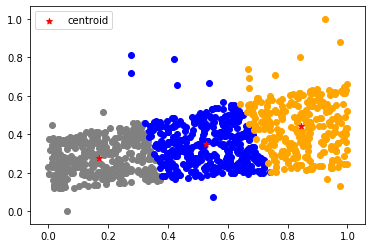

In [173]:
a0=a[a.cluster==0]
a1=a[a.cluster==1]
a2=a[a.cluster==2]

plt.scatter(a0.PRICEEACH,a0['SALES'],color='gray')
plt.scatter(a1.PRICEEACH,a1['SALES'],color='blue')
plt.scatter(a2.PRICEEACH,a2['SALES'],color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')

plt.legend()

In [134]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['PRICEEACH','SALES']])
    sse.append(km.inertia_)

In [135]:
sse

[813395757.291982,
 280726187.59173125,
 141532152.1449054,
 89004329.97443151,
 63386720.349191286,
 44648038.42372377,
 34730692.6933846,
 26699758.977511328,
 21459538.156875983]

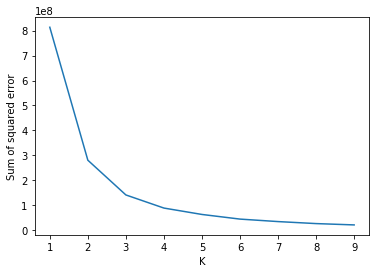

In [117]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)